In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path saving 
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'


In [72]:
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
plot_dir = os.path.join(plot_dir, 'MS_single_sample_plots')
#os.mkdir(plot_dir)
base_plot = 'v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA'
save_suffix = 'fix-sample'

In [ ]:
print(plot_dir)

In [5]:
# Read intermediate file 
df_plot = pd.read_csv(os.path.join(gene_eq_path, 'exp_427_kmers_plot2_fix-sample.csv.gz'),
                                   #'exp_427_kmers_plot2.csv.gz', #exp_427_kmers_plot
                      compression = 'gzip' )

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,8,9,10,11,15,1120) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [60]:
samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

In [6]:
df_plot.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence
0,2,56.0,1.0,0.0,0.0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0
1,2,57.0,1.0,0.0,0.0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,0.0,0.0,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0
2,4,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,72.0,28.0,156.0,164.0,112.0,651.0,True,1.0,0.0,1100.0
3,5,12.0,0.0,0.0,1.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0
4,6,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,0.0,1.0,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0


In [7]:
# # TEST 
# grp = df_plot.groupby(['>pepID',
#  "includes_5'",
#  "includes_3'",
#  'gene',
#  'kmer',
#  'peptide',
#  'sample',
#  'percentile_rank',
#  'affinity',
#  'strand',
#  'GTEX_presence',
#  'index',
#  'isCrossJunction',
#  'recurrence']).count()

# grp = grp.loc[grp['jx_pos'] == 2 , :]

# grp = grp.reset_index()

# test = df_plot.set_index('>pepID')

# test = test.loc[grp['>pepID']]

# test =test.drop_duplicates() # 3 exons only 

In [8]:
# # TEST 
# # kmers from 3 exon derived peptides
# test.loc[test['sample'] == 'TCGABHA18V01A11RA12D07all', 'kmer'].unique() 

In [9]:
# Some type conversions
# df_plot['junctionAnnotated'] = df_plot['junctionAnnotated'].astype(str)
# df_plot['readFrameAnnotated'] = df_plot['readFrameAnnotated'].astype(str)

In [59]:
# Annotate MHC
df_plot['MHC-I binding status'] = 'not computed'

df_plot.loc[df_plot['percentile_rank'] <=2 ,
            'MHC-I binding status'] = 'strong binding'
df_plot.loc[ (10 >= df_plot['percentile_rank']) &
              (df_plot['percentile_rank'] > 2), 
            'MHC-I binding status'] = 'weak binding'
df_plot.loc[ 10 < df_plot['percentile_rank'] ,
            'MHC-I binding status'] = 'not binding'

In [11]:
df_plot.columns

Index(['>pepID', 'jx_pos', 'between_codons', 'includes_5'', 'includes_3'',
       'gene', 'jx_coord', 'kmer', 'readFrameAnnotated', 'junctionAnnotated',
       ...
       'TCGAWTAB4401A11RA41B07all', 'TCGAXXA89901A11RA36F07all',
       'TCGAXXA89A01A11RA36F07all', 'TCGAZ7A8R501A42RA41B07all',
       'TCGAZ7A8R601A11RA41B07all', 'isCrossJunction',
       'junctionAnnotated_kmer', 'readFrameAnnotated_kmer', 'recurrence',
       'MHC-I binding status'],
      dtype='object', length=1125)

In [12]:
meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 
cohort = [ col for col in df_plot.columns if 'TCGA' in col ] 

In [13]:
meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'readFrameAnnotated',
 'junctionAnnotated',
 'origin',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'MHC-I binding status']

# Correction for kmers from multiple junctions

In [14]:
df_group = df_plot.groupby(['kmer']).sum()
display(df_group.shape)
not_GTEX_cross_samples = df_group.loc[df_group['GTEX_presence'] == 0, :].reset_index()[['kmer']]
not_GTEX_cross_samples = df_plot.merge(not_GTEX_cross_samples, on = 'kmer', how = 'right')

(30082, 1114)

# Figure1 

In [97]:
recurrence_max = 30
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ), 
                  ['recurrence', 'kmer', 'GTEX_presence'] + cohort ].drop_duplicates()
print('number of kmers', tmp.shape[0])


number of kmers 3802


In [98]:
tmp[tmp == 0] = np.nan
means = np.nanmean(tmp.loc[:, cohort], axis=1)
medians = np.nanmedian(tmp.loc[:, cohort], axis=1)

In [99]:
tmp['mean_exp'] = means
tmp['median_exp'] = medians

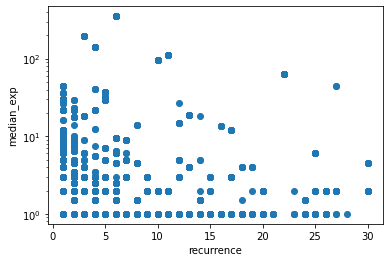

In [100]:
plt.scatter(tmp['recurrence'], tmp['median_exp'])
plt.xlabel('recurrence')
plt.ylabel('median_exp')
plt.yscale("log")  
#plt.ylim([0.1, max(tmp['median_exp'])])

number of kmers 3802
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_recurrence_expression_fix-sample.pdf


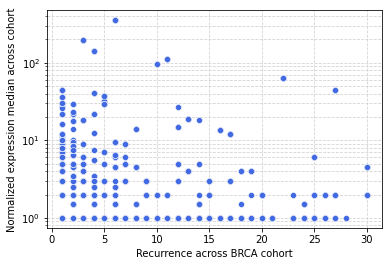

In [101]:
#plt.grid(True, which='both', color='lightgrey')
ax = sns.scatterplot(data = tmp, x = 'recurrence', y= 'median_exp', 
                #, hue = 'readFrameAnnotated'
               edgecolors = 'black', 
               facecolors='royalblue')
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgrey', linestyle='dashed', which='both')
ax.xaxis.grid(color='lightgrey', linestyle='dashed', which='both')
print('number of kmers', tmp.shape[0])
plt.xlabel('Recurrence across BRCA cohort')
plt.ylabel('Normalized expression median across cohort')
plt.yscale("log")  

#plt.ylim([0.1, max(tmp['median_exp'])])

save = False
suffix = 'recurrence_expression'
save_path = os.path.join(plot_dir, f'{base_plot}_{suffix}_{save_suffix}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [104]:
tmp.head()

,recurrence,kmer,GTEX_presence,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,TCGA4HAAAK01A12RA41B07all,TCGA5LAAT001A12RA41B07all,TCGA5LAAT101A12RA41B07all,...,TCGAV7A7HQ01A11RA33J07all,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,mean_exp,median_exp
18,1.0,AAALQQHSS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
41,1.0,AACGPAGGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
153,4.0,AAISEAVRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.5
196,1.0,AALQQHSSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
284,2.0,AARSMATTP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.5


In [105]:
tmp.loc[(tmp['recurrence'] > 10)
        & (tmp['median_exp'] > 10), 'kmer'].unique().shape

(59,)

In [103]:
tmp.loc[tmp['recurrence'] > 10, 'kmer'].unique().shape


(461,)

# Figure 2

In [86]:
recurrence_max = 30 
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ) &
                  (df_plot['MHC-I binding status'] != 'not computed'), 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'MHC-I binding status', 
                  'percentile_rank', 
                  ] + cohort ].drop_duplicates()
print(tmp.shape)

(3016, 1107)


(array([787., 213.,  81.,  83.,  78.,  46.,  24.,  10.,  35.,  19.]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <BarContainer object of 10 artists>)

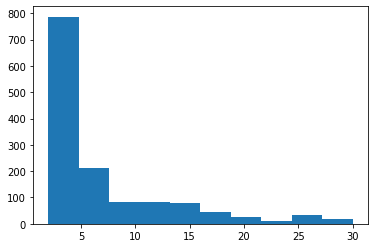

In [87]:
plt.hist(tmp.loc[tmp['recurrence'] > 1, 'recurrence'])

(array([787., 213.,  81.,  83.,  78.,  46.,  24.,  10.,  35.,  19.]),
 array([ 2. ,  4.8,  7.6, 10.4, 13.2, 16. , 18.8, 21.6, 24.4, 27.2, 30. ]),
 <BarContainer object of 10 artists>)

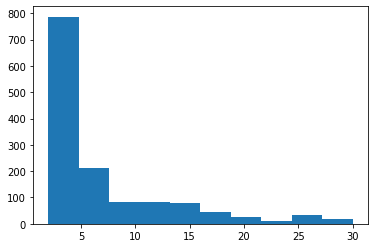

In [88]:
plt.hist(tmp.loc[tmp['recurrence'] > 1, 'recurrence'])

number of kmers 3016
number of kmers 3016
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_recurrence_expression_binding_test_fix-sample.pdf


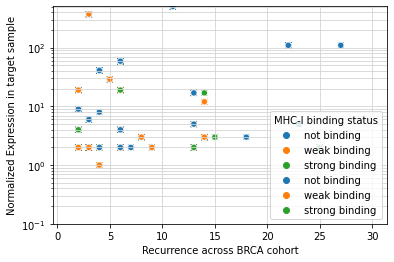

In [89]:
markers = ['x', 'o']
for idx, sample in enumerate(['TCGAC8A12P01A11RA11507all', 'TCGAC8A12P01A11RA11507all']):
    # here subset to sample 
    # check expression > 0 in sample
    # add the name of the sample to the MHC binding status rename
    ax = sns.scatterplot(data = tmp, x = 'recurrence', y = 'TCGAC8A12P01A11RA11507all', 
                    hue = 'MHC-I binding status',
                   marker = markers[idx])
    print('number of kmers', tmp.shape[0])
    plt.xlabel('Recurrence across BRCA cohort')
    plt.ylabel('Normalized Expression in target sample')
    plt.yscale("log")  
    plt.grid(True, which='both', color='lightgrey')
    plt.ylim([0.1, max(tmp[sample])])
    
save = True
name = 'recurrence_expression_binding_test'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}_{save_suffix}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [90]:
l = ax.get_legend_handles_labels()

 Remark, did not compute the binding for the kmers which had expression < 2 in first pass

In [91]:
tmp.loc[tmp['MHC-I binding status'] == 'not computed', 'TCGAC8A12P01A11RA11507all'].describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: TCGAC8A12P01A11RA11507all, dtype: float64

# Figure 3 

In [106]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ) &
                  (df_plot['MHC-I binding status'] != 'not computed'), 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'MHC-I binding status', 'gene',
                  'percentile_rank', 
                  ] + cohort ].drop_duplicates()

In [107]:
tmp.shape

(3016, 1108)

In [108]:
tmp = pd.melt(tmp, id_vars=['gene', 'kmer'], value_vars=cohort, 
             value_name='Normalized RNA expression of junction', 
             var_name='sample')

In [95]:
tmp.shape

(3323632, 4)

In [96]:
tmp.head()

,gene,kmer,sample,Normalized RNA expression of junction
0,ENSG00000060339.14,AAALQQHSS,TCGA3CAAAU01A11RA41B07all,0.0
1,ENSG00000188976.11,AACGPAGGS,TCGA3CAAAU01A11RA41B07all,0.0
2,ENSG00000204217.15,AAISEAVRS,TCGA3CAAAU01A11RA41B07all,0.0
3,ENSG00000060339.14,AALQQHSSV,TCGA3CAAAU01A11RA41B07all,0.0
4,ENSG00000155659.15,AARSMATTP,TCGA3CAAAU01A11RA41B07all,0.0


In [47]:
# launch overnight 1/3 in 40 minutes
expr1 = []
expr2 = []
expr3 = []
thres1 = 0 
thres2 = 10
thres3 = 100
for idx, sample in enumerate(cohort):
    print(idx)
    tmp1 = tmp.loc[(tmp['sample'] == sample) & 
                   tmp['Normalized RNA expression of junction'] > thres1 , 
                   : ].drop_duplicates()
    expr1.append(tmp1.shape[0])
    
    tmp2 = tmp1.loc[tmp1['Normalized RNA expression of junction'] > thres2 , 
                   : ].drop_duplicates()
    expr2.append(tmp2.shape[0])
    
    tmp3 = tmp2.loc[tmp2['Normalized RNA expression of junction'] > thres3 , 
                   : ].drop_duplicates()
    expr3.append(tmp3.shape[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [48]:
sample_kmer_plot = pd.DataFrame({f'Normalized RNA expression > {thres1}':expr1, 
              f'Normalized RNA expression > {thres2}':expr2, 
              f'Normalized RNA expression > {thres3}':expr3})

In [49]:
sample_kmer_plot.head()

,Normalized RNA expression > 0,Normalized RNA expression > 10,Normalized RNA expression > 100
0,8,0,0
1,0,0,0
2,0,0,0
3,3,0,0
4,11,11,0


In [226]:
# sample_kmer_plot.to_csv(os.path.join(gene_eq_path, 'tmp_sample_count_pot.csv.gz'), 
#                       compression = 'gzip', index = None )

number of kmers 3654
number of kmers 3654
number of kmers 3654
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_sample_kmer_nb_recurrence30_fix-sample.pdf


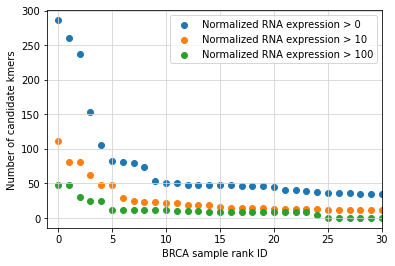

In [78]:
plt.grid(True, which='both', color='lightgrey')
max_val = np.max(sample_kmer_plot.values) + 1
#plt.yscale("log")  
# plt.ylim([0.1,max_val])
max_rec = 30
plt.xlim(-1, max_rec)
#plt.semilogy(basey=10)
for idx, col in enumerate(sample_kmer_plot.columns):
    X = np.arange(sample_kmer_plot.shape[0])
    Y = np.sort(sample_kmer_plot[col])[::-1]
    ax = plt.scatter(X, Y, label = col, 
                    marker = 'o')
    print('number of kmers', tmp.shape[0])
    plt.ylabel('Number of candidate kmers')
    plt.xlabel('BRCA sample rank ID')
plt.legend()




save = False
suffix = 'sample_kmer_nb'
rec = 'recurrence' + str(max_rec)
save_path = os.path.join(plot_dir, f'{base_plot}_{suffix}_{rec}_{save_suffix}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [112]:
sample_kmer_plot.loc[sample_kmer_plot['Normalized RNA expression > 10'] == 112]

,Normalized RNA expression > 0,Normalized RNA expression > 10,Normalized RNA expression > 100
684,260,112,30


In [118]:
sample_kmer_plot.sort_values('Normalized RNA expression > 100')

,Normalized RNA expression > 0,Normalized RNA expression > 10,Normalized RNA expression > 100
0,8,0,0
721,12,0,0
722,1,0,0
723,1,0,0
724,13,0,0
...,...,...,...
213,79,47,24
763,73,47,24
684,260,112,30
194,81,81,47


In [110]:
sample_kmer_plot.max()

Normalized RNA expression > 0      286
Normalized RNA expression > 10     112
Normalized RNA expression > 100     47
dtype: int64

In [51]:
# tmp['Number kmers expressed in sample'] = 0 
# for idx, sample in enumerate(cohort):
#     print(idx)
#     vals =  df_plot.loc[ : , ['kmer', sample]].drop_duplicates()
#     vals = vals[sample].values
#     tmp.loc[tmp['sample'] == sample, 
#             'Number kmers expressed in sample'] = len(np.where(vals > 0 )[0])
#     tmp.loc[tmp['sample'] == sample, 
#             'Number kmers expressed > 10 in sample'] = len(np.where(vals > 10 )[0])
#     tmp.loc[tmp['sample'] == sample, 
#             'Number kmers expressed > 100 in sample'] = len(np.where(vals > 100 )[0])

In [52]:
# tmp = pd.melt(df_plot, id_vars=['gene', 'kmer', 'sample'], 
#               value_vars=['Number kmers expressed in sample', 
#                           'Number kmers expressed > 10 in sample',
#                           'Number kmers expressed > 100 in sample']
#              value_name='Candidate kmers per cancer sample', 
#              var_name='Expression level')

In [53]:
tmp.head()

,gene,kmer,sample,Normalized RNA expression of junction
0,ENSG00000060339.14,AAALQQHSS,TCGA3CAAAU01A11RA41B07all,0.0
1,ENSG00000188976.11,AACGPAGGS,TCGA3CAAAU01A11RA41B07all,0.0
2,ENSG00000204217.15,AAISEAVRS,TCGA3CAAAU01A11RA41B07all,0.0
3,ENSG00000060339.14,AALQQHSSV,TCGA3CAAAU01A11RA41B07all,0.0
4,ENSG00000155659.15,AARSMATTP,TCGA3CAAAU01A11RA41B07all,0.0


# Figure 4 

In [119]:
meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 


In [135]:
recurrence_max = 30 
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] <= recurrence_max ) &
                  (df_plot['MHC-I binding status'] != 'not computed'), 
                  ['recurrence', 'kmer', 'GTEX_presence', 
                  'MHC-I binding status', 
                  'percentile_rank', 
                   'sample'
                  ] + cohort ].drop_duplicates()
print(tmp.shape)

(3654, 1108)


In [121]:
meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'readFrameAnnotated',
 'junctionAnnotated',
 'origin',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'MHC-I binding status']

In [122]:
tmp.head()

,recurrence,kmer,GTEX_presence,MHC-I binding status,percentile_rank,sample,TCGA3CAAAU01A11RA41B07all,TCGA3CAALI01A11RA41B07all,TCGA3CAALJ01A31RA41B07all,TCGA3CAALK01A11RA41B07all,...,TCGAULAAZ601A11RA41B07all,TCGAUUA93S01A21RA41B07all,TCGAV7A7HQ01A11RA33J07all,TCGAW8A86G01A21RA36F07all,TCGAWTAB4101A11RA41B07all,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all
18,1.0,AAALQQHSS,0.0,not binding,14.0,TCGABHA18V01A11RA12D07all,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,1.0,AACGPAGGS,0.0,not binding,15.0,TCGABHA18V01A11RA12D07all,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,4.0,AAISEAVRS,0.0,not binding,22.0,TCGABHA18V01A11RA12D07all,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,1.0,AALQQHSSV,0.0,weak binding,2.5,TCGABHA18V01A11RA12D07all,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,2.0,AARSMATTP,0.0,not binding,11.0,TCGABHA18V01A11RA12D07all,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# triangles, rounds, square, crosses, diamonds

TCGA-BH-A18V-01A-11R-A12D-07.all
(229, 1108)


/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 64.7% of the points cannot be placed; you may want 

TCGA-C8-A12P-01A-11R-A115-07.all
(260, 1108)


/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 88.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.6% of the points cannot be placed; you may want 

TCGA-AO-A0JM-01A-21R-A056-07.all
(284, 1108)


/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want 

TCGA-A2-A0SX-01A-12R-A084-07.all
(105, 1108)


/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want 

TCGA-A2-A0D2-01A-21R-A034-07.all
(145, 1108)


/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want 

save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_recurrence_expression_binding_fix-sample.pdf


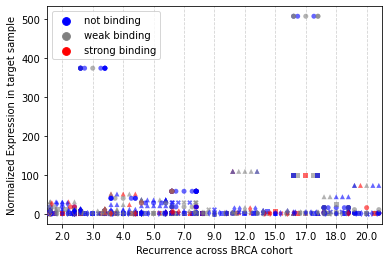

In [77]:
markers = ['^', 'o', 's', 'X', 'd']

all_tmp_plots = []
for idx, sample in enumerate(samples):
    print(sample)
    sample_short = ''.join(sample.split('.')[:-1])
    sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
    sample_nice = '_'.join(sample_short.split('-')[0:3])
    sample_pool = sample.replace('-', '').replace('.', '')

    tmp_plot = tmp.loc[(tmp['sample'] == sample_pool) &
                       (tmp[sample_pool] > 0 ), :]
    new_name = 'MHC-I binding status {}'.format('')
    tmp_plot = tmp_plot.rename({'MHC-I binding status':
                               new_name}, axis = 1)
    
    all_tmp_plots.append(tmp_plot)
    print(tmp_plot.shape)
    if len(tmp_plot):
        ax = sns.swarmplot(data = tmp_plot, x = 'recurrence', y = sample_pool, 
                        hue = new_name, marker = markers[idx], 
                          # jitter = 2
                          palette = ['b', 'grey', 'r'], alpha = 0.6)


    #plt.show()
plt.xlabel('Recurrence across BRCA cohort')
plt.ylabel('Normalized Expression in target sample')
#plt.yscale("log")  
# plt.grid(True, which='both', color='lightgrey')
ax.xaxis.grid(color='lightgrey', linestyle='dashed', which='both')
#plt.ylim([0.1, max(tmp[sample])])
#plt.xlim([0, 30])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3], labels[:3])
    
save = False
name = 'recurrence_expression_binding'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}_{save_suffix}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
plt.show()

In [129]:
tmp_plot.columns[3]

'MHC-I binding status '

In [140]:
tmp_plot['MHC-I binding status'].unique()

array(['not binding', 'weak binding', 'strong binding'], dtype=object)

In [143]:
reads = 10 
for i in tmp_plot['MHC-I binding status'].unique():
    for idx, sample in enumerate(samples):
        print(sample)
        sample_short = ''.join(sample.split('.')[:-1])
        sample_lower = '_'.join(sample_short.split('-')[1:3]).lower()
        sample_nice = '_'.join(sample_short.split('-')[0:3])
        sample_pool = sample.replace('-', '').replace('.', '')

        tmp_plot = tmp.loc[(tmp['sample'] == sample_pool) &
                           (tmp[sample_pool] > reads ), :]
        print(i, j)
        print(tmp_plot.loc[(tmp_plot['MHC-I binding status'] == i), :].shape)

TCGA-BH-A18V-01A-11R-A12D-07.all
not binding TCGAA2A0D201A21RA03407all
(31, 1108)
TCGA-C8-A12P-01A-11R-A115-07.all
not binding TCGAA2A0D201A21RA03407all
(62, 1108)
TCGA-AO-A0JM-01A-21R-A056-07.all
not binding TCGAA2A0D201A21RA03407all
(11, 1108)
TCGA-A2-A0SX-01A-12R-A084-07.all
not binding TCGAA2A0D201A21RA03407all
(8, 1108)
TCGA-A2-A0D2-01A-21R-A034-07.all
not binding TCGAA2A0D201A21RA03407all
(10, 1108)
TCGA-BH-A18V-01A-11R-A12D-07.all
weak binding TCGAA2A0D201A21RA03407all
(23, 1108)
TCGA-C8-A12P-01A-11R-A115-07.all
weak binding TCGAA2A0D201A21RA03407all
(38, 1108)
TCGA-AO-A0JM-01A-21R-A056-07.all
weak binding TCGAA2A0D201A21RA03407all
(2, 1108)
TCGA-A2-A0SX-01A-12R-A084-07.all
weak binding TCGAA2A0D201A21RA03407all
(8, 1108)
TCGA-A2-A0D2-01A-21R-A034-07.all
weak binding TCGAA2A0D201A21RA03407all
(7, 1108)
TCGA-BH-A18V-01A-11R-A12D-07.all
strong binding TCGAA2A0D201A21RA03407all
(7, 1108)
TCGA-C8-A12P-01A-11R-A115-07.all
strong binding TCGAA2A0D201A21RA03407all
(12, 1108)
TCGA-AO-A0